In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn import metrics, preprocessing ,svm
from sklearn.linear_model import LogisticRegression  
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from io import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
from sklearn.metrics import classification_report, confusion_matrix
import itertools
%matplotlib inline

In [2]:
df_S = pd.read_csv('heart.csv')
df_S.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df_S.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [4]:
xs = np.asanyarray(df_S[['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall']])
ys = np.asanyarray(df_S['output'])

In [5]:
train_xs , test_xs , train_ys , test_ys = train_test_split(xs,ys,test_size=0.2,random_state=4)


In [6]:
heartsv = svm.SVC(kernel='linear').fit(train_xs,train_ys)
heartsv

SVC(kernel='linear')

In [8]:
yshat = heartsv.predict(test_xs)
sf1_score= metrics.f1_score(test_ys , yshat)
sacc_score = metrics.accuracy_score(test_ys , yshat)
sf2_score = metrics.fbeta_score(test_ys , yshat, beta=2, average='weighted')
print(f'accuracy score:{sacc_score}')
print(f'f1 score:{sf1_score}')
print(f'f2 score:{sf2_score}')

accuracy score:0.9180327868852459
f1 score:0.9315068493150684
f2 score:0.917861869688054


In [9]:
def plot_confusion_matrixsv(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[22  3]
 [ 2 34]]


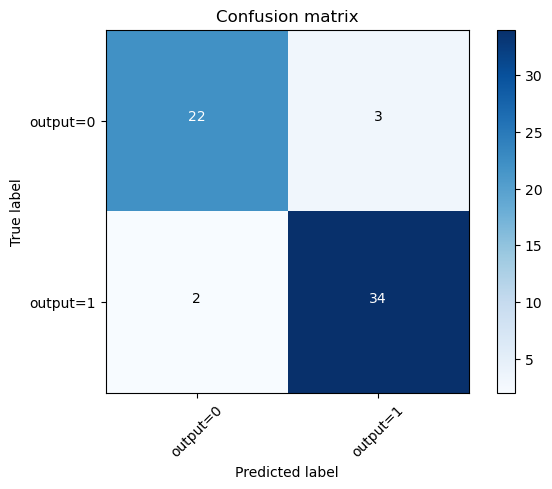

In [10]:

cnf_matrixsv = confusion_matrix(test_ys, yshat)
np.set_printoptions(precision=2)




plt.figure()
plot_confusion_matrixsv(cnf_matrixsv, classes=['output=0','output=1'],normalize= False,  title='Confusion matrix')
plt.show()